In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [8]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
display(lending_data_df.head())
lending_data_df.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [14]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop(columns=['loan_status'], axis=1)

In [71]:
# Review the y variable Series
display(y.shape)
y.value_counts()

(77536,)

0    75036
1     2500
Name: loan_status, dtype: int64

In [19]:
# Review the X variable DataFrame
X.shape

(77536, 7)

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [114]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_test.value_counts()

0    7504
1     250
Name: loan_status, dtype: int64

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [21]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [33]:
# Make a prediction using the testing data
y_test_predictions = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [108]:
# Generate a confusion matrix for the model
test_confusion_matrix = confusion_matrix(y_test, y_test_predictions)
print(test_confusion_matrix)

[[7440   37]
 [  29  248]]


In [113]:
# Function to generate a labelled confusion matrix
def labelled_confusion_matrix(cm):
    TP=cm[0,0]
    FN=cm[0,1]
    FP=cm[1,0]
    TN=cm[1,1]
    labelled_matrix = [[f'TP= {TP}', f'FN= {FN}'],
              [f'FP= {FP}', f'TN= {TN}']]
    print(f"{'':<12}{'pred_pos':<12}{'pred_neg'}")
    print(f"{'true_pos':<12}{labelled_matrix[0][0]:<12}{labelled_matrix[0][1]}")
    print(f"{'true_neg':<12}{labelled_matrix[1][0]:<12}{labelled_matrix[1][1]}")

In [112]:
# Generate a labelled confusion matrix
labelled_confusion_matrix(test_confusion_matrix)

            pred_pos    pred_neg
true_pos    TP= 7440    FN= 37
true_neg    FP= 29      TN= 248


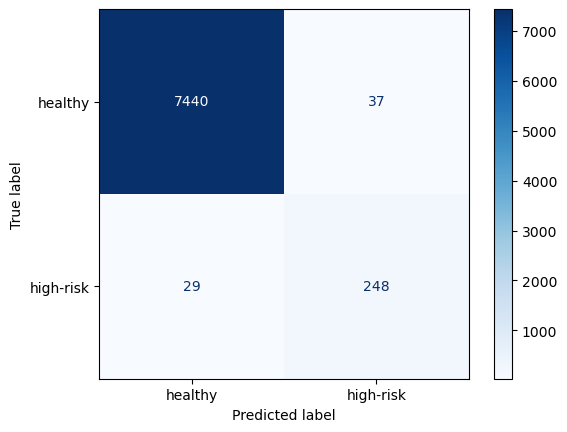

In [107]:
# Generate a nice plot of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cmdisplay= ConfusionMatrixDisplay(test_confusion_matrix, display_labels = ['healthy', 'high-risk']).plot(cmap='Blues')

In [50]:
# Print the classification report for the model
print(classification_report(y_test, y_test_predictions, target_names = ['healthy','high-risk'], digits = 3))


              precision    recall  f1-score   support

     healthy      0.996     0.995     0.996      7477
   high-risk      0.870     0.895     0.883       277

    accuracy                          0.991      7754
   macro avg      0.933     0.945     0.939      7754
weighted avg      0.992     0.991     0.992      7754



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Our logistic regression model has very high recall for predicting healthy loans. Of 7477 healthy loans in the test set, we correctly predicted the 'healthy' label for 7440 (recall = 0.995). However our model performs relatively poorly for predicting loans at high risk of defaulting. Of 277 high risk loans in our test set, our model correctly predicted the 'high-risk' label for 248 (recall = 0.895). One reason for the relatively poorer performance is class imbalance in the training data set. Only approximately 3% of records in the training data belonged to class label 'high-risk'. 

---